In [1]:
import tensorflow as tf

In [2]:
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
import pathlib

PATH='C:/Users/User/.keras/datasets/flower_photos/'
train_dir=os.path.join(PATH,'train')
val_dir=os.path.join(PATH,'validation')

train_dir=pathlib.Path(train_dir)
val_dir=pathlib.Path(val_dir)

In [4]:
train_image_count=len(list(train_dir.glob('*/*.jpg')))
val_image_count=len(list(val_dir.glob('*/*.jpg')))
print(train_image_count)
print(val_image_count)

3170
500


In [5]:
CLASS_NAMES = np.array([item.name for item in train_dir.glob('*') if item.name != "LICENSE.txt"])
CLASS_NAMES

array(['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips'],
      dtype='<U10')

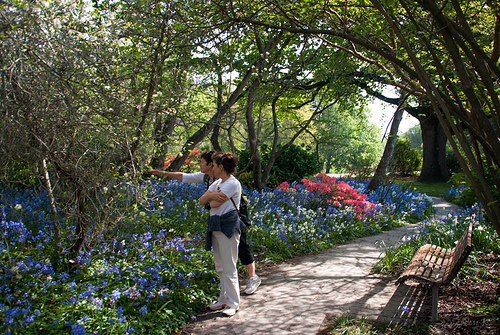

In [6]:
roses = list(train_dir.glob('tulips/*'))

for image_path in roses[:3]:
    display.display(Image.open(str(image_path)))

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, MaxPool2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display

In [8]:
train_image_generator = ImageDataGenerator(
                    rescale=1./255,
                    #rotation_range=45,
                    #width_shift_range=.15,
                    #height_shift_range=.15,
                    horizontal_flip=True,
                    #zoom_range=0.5
                    )
val_image_generator = ImageDataGenerator(
                    rescale=1./255,
                    #rotation_range=45,
                    #width_shift_range=.15,
                    #height_shift_range=.15,
                    horizontal_flip=True,
                    #zoom_range=0.5
                    )

In [9]:
BATCH_SIZE = 50
IMG_HEIGHT = 224
IMG_WIDTH = 224
STEPS_PER_EPOCH = np.ceil(train_image_count/BATCH_SIZE)

In [10]:
STEPS_PER_EPOCH

64.0

In [11]:
#import IPython.display as display
from IPython.display import display 
from PIL import Image
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

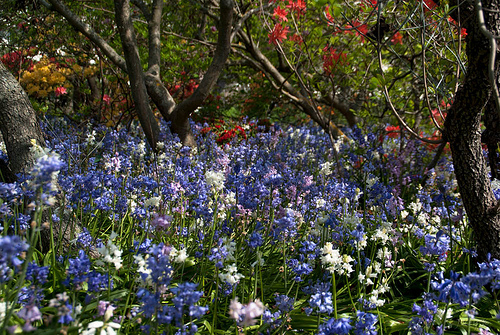

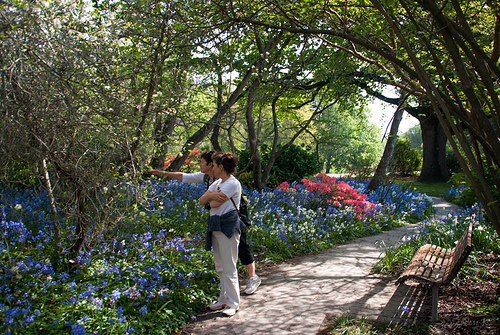

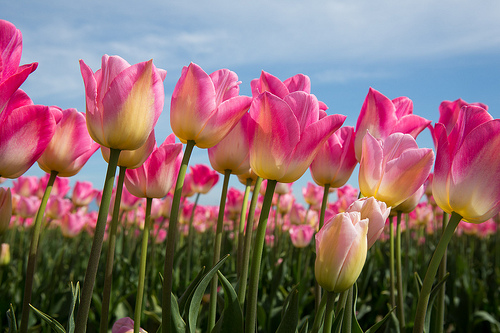

In [26]:
label_tulips=list(train_dir.glob('tulips/*'))

for image_path in label_tulips[:3]:
    display(Image.open(str(image_path)))

In [13]:
train_data_generator = train_image_generator.flow_from_directory(directory=str(train_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES))
val_data_generator = val_image_generator.flow_from_directory(directory=str(val_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES))

Found 3170 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


In [14]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
      plt.axis('off')

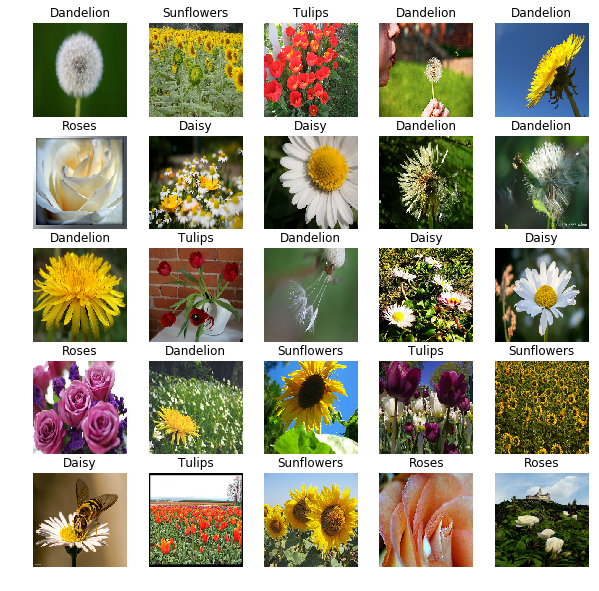

In [15]:
image_batch_val, label_batch_val = next(val_data_generator)
show_batch(image_batch_val, label_batch_val)

In [16]:
input_shape = (224,224,3) # RGB影像224x224（height,width,channel)

# 使用序贯模型(sequential)来定义
model = Sequential()

# 第1个卷积区块(block1)
model.add(Conv2D(64,(3,3),padding='same',activation='relu',input_shape=input_shape,name='block1_conv1'))
#model.add(Conv2D(64,(3,3),padding='same',activation='relu',name='block1_conv2'))
model.add(MaxPool2D((2,2),strides=(2,2),name='block1_pool'))

# 第2个卷积区块(block2)
model.add(Conv2D(128,(3,3),padding='same',activation='relu',name='block2_conv1'))
#model.add(Conv2D(128,(3,3),padding='same',activation='relu',name='block2_conv2'))
model.add(MaxPool2D((2,2),strides=(2,2),name='block2_pool'))

# 第3个区块(block3)
model.add(Conv2D(256,(3,3),padding='same',activation='relu',name='block3_conv1'))
#model.add(Conv2D(256,(3,3),padding='same',activation='relu',name='block3_conv2'))
#model.add(Conv2D(256,(3,3),padding='same',activation='relu',name='block3_conv3'))
model.add(MaxPool2D((2,2),strides=(2,2),name='block3_pool'))

# 第4个区块(block4)
model.add(Conv2D(512,(3,3),padding='same',activation='relu',name='block4_conv1'))
#model.add(Conv2D(512,(3,3),padding='same',activation='relu',name='block4_conv2'))
#model.add(Conv2D(512,(3,3),padding='same',activation='relu',name='block4_conv3'))
model.add(MaxPool2D((2,2),strides=(2,2),name='block4_pool'))

# 第5个区块(block5)
model.add(Conv2D(512,(3,3),padding='same',activation='relu',name='block5_conv1'))
#model.add(Conv2D(512,(3,3),padding='same',activation='relu',name='block5_conv2'))
#model.add(Conv2D(512,(3,3),padding='same',activation='relu',name='block5_conv3'))
model.add(MaxPool2D((2,2),strides=(2,2),name='block5_pool'))

# 前馈全连接区块
model.add(Flatten(name='flatten'))
model.add(Dense(2048,activation='relu',name='fc1'))
model.add(Dense(1024,activation='relu',name='fc2'))
model.add(Dense(5,activation='softmax',name='predictions'))


model.build(input_shape)
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
_________________________________________________________________
block3_pool (MaxPooling2D)   (None, 28, 28, 256)       0         
_________________________________________________________________
bloc

In [17]:
import pydot

In [18]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
try:
    model.load_weights("SaveModel/VGG_flower5Model_epoch1_to_epoch15_deep.h5")
    print("load model successful. Continue train model..")
except:
    print("load model failed. Start train a new model")

load model failed. Start train a new model


In [20]:
history_part1 = model.fit_generator(train_data_generator,
                    steps_per_epoch=STEPS_PER_EPOCH, 
                    epochs=15,
                    validation_data=val_data_generator,
                    validation_steps=50,
                    verbose=1
)

model.save_weights("SaveModel/VGG_flower5Model_epoch1_to_epoch15_deep.h5")
print("Save model to disk")

Instructions for updating:
Use tf.cast instead.
Epoch 1/15
64/64 [==============================] - 19s 294ms/step - loss: 1.6388 - acc: 0.3110 - val_loss: 1.3466 - val_acc: 0.4700
Epoch 2/15
64/64 [==============================] - 13s 200ms/step - loss: 1.2229 - acc: 0.4729 - val_loss: 1.0793 - val_acc: 0.5480
Epoch 3/15
64/64 [==============================] - 13s 199ms/step - loss: 1.0812 - acc: 0.5539 - val_loss: 1.0607 - val_acc: 0.5640
Epoch 4/15
64/64 [==============================] - 13s 204ms/step - loss: 0.9551 - acc: 0.6309 - val_loss: 0.9705 - val_acc: 0.6280
Epoch 5/15
64/64 [==============================] - 13s 200ms/step - loss: 0.8608 - acc: 0.6640 - val_loss: 0.9479 - val_acc: 0.6100
Epoch 6/15
64/64 [==============================] - 13s 205ms/step - loss: 0.7790 - acc: 0.6864 - val_loss: 1.0536 - val_acc: 0.6300
Epoch 7/15
64/64 [==============================] - 13s 200ms/step - loss: 0.7302 - acc: 0.7057 - val_loss: 0.9322 - val_acc: 0.6460
Epoch 8/15
64/64 [===

In [21]:
class_names = sorted(val_data_generator.class_indices.items(), key=lambda pair:pair[1])
class_names = np.array([key.title() for key, value in class_names])
class_names

array(['Daisy', 'Dandelion', 'Roses', 'Sunflowers', 'Tulips'],
      dtype='<U10')

In [22]:
image_batch_val, label_batch_val = next(val_data_generator)

predicted_batch = model.predict(image_batch_val)
predicted_id = np.argmax(predicted_batch, axis=-1)
predicted_label_batch = class_names[predicted_id]

In [23]:
label_id = np.argmax(label_batch_val, axis=-1)

In [28]:
image_batch_val, label_batch_val = next(val_data_generator)
predicted_batch = model.predict(image_batch_val)
predicted_id = np.argmax(predicted_batch, axis=-1)
predicted_label_batch = class_names[predicted_id]

label_id = np.argmax(label_batch_val, axis=-1)

plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(image_batch_val[n])
  color = "blue" if predicted_id[n] == label_id[n] else "red"
  plt.title(predicted_label_batch[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (blue: correct, red: incorrect)")